# Observational dataset n = 10

In [1]:
from result_utils import plot_everything
base_path = "ToyGraph"

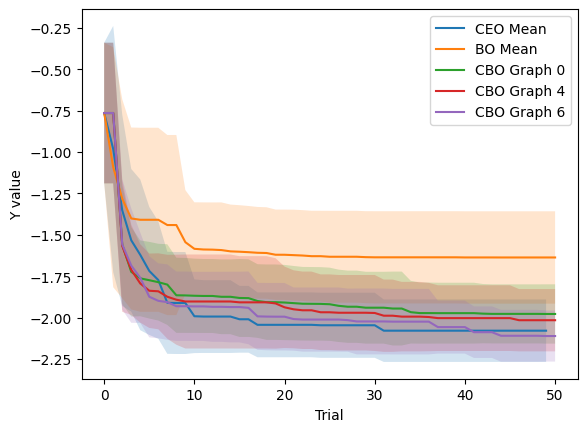

In [2]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=10, num_cbo_graphs=7,save_file=True, plot_ceo=True, graph_idxs = [0, 4, 6])

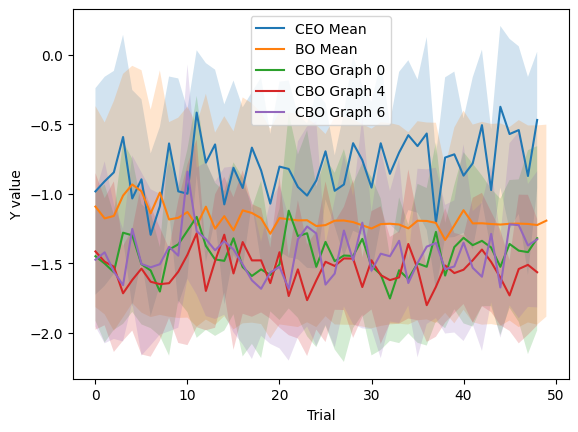

In [3]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=10, num_cbo_graphs=7,save_file=True, plot_ceo=True, graph_idxs = [0, 4, 6])

# Observational dataset n = 50

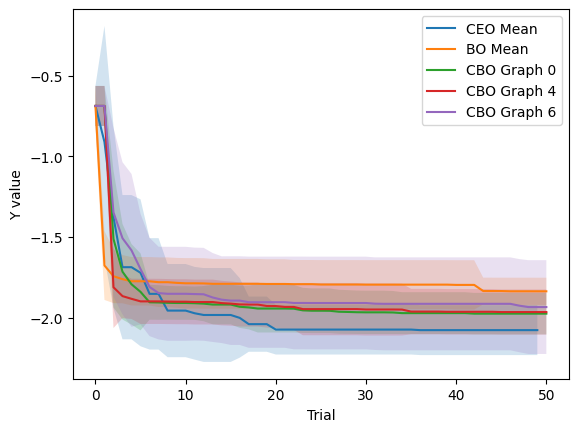

In [6]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=50, num_cbo_graphs=7,save_file=True, graph_idxs = [0, 4, 6])

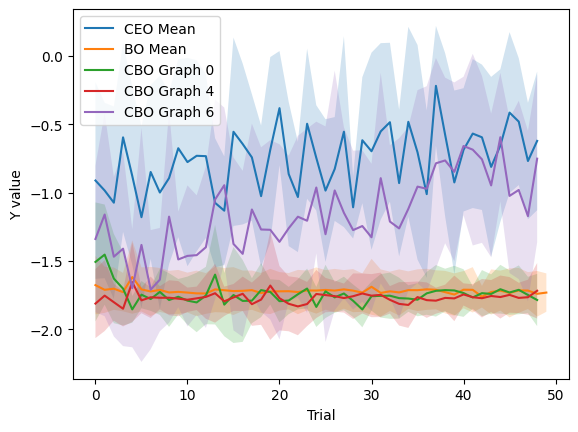

In [7]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=50, num_cbo_graphs=7,save_file=True, graph_idxs = [0, 4, 6])

# Observational dataset n = 100

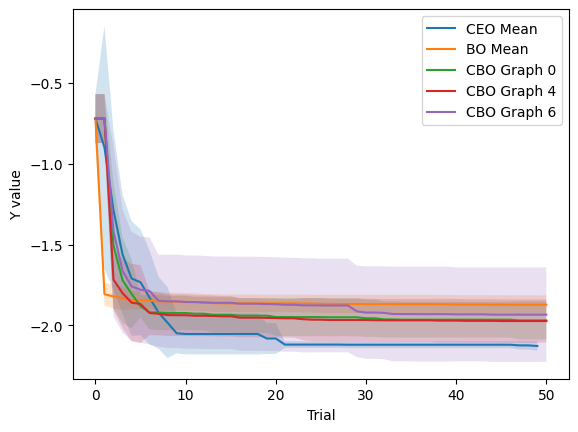

In [8]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=100, num_cbo_graphs=7,save_file=True, graph_idxs = [0, 4, 6])

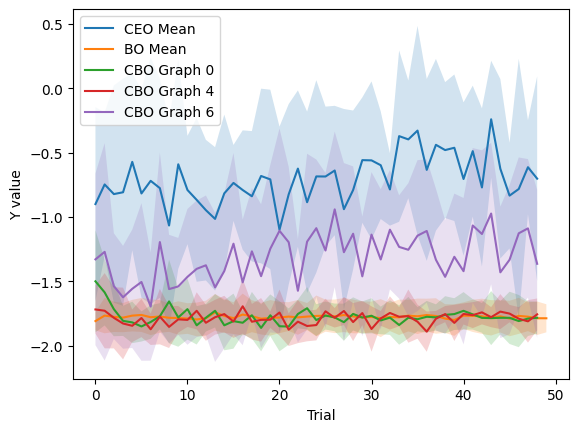

In [9]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=100, num_cbo_graphs=7,save_file=True, graph_idxs = [0, 4, 6])

# Observational dataset n= 200

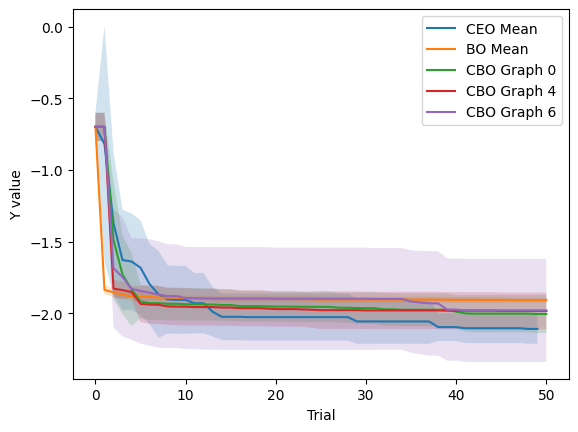

In [10]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=200, num_cbo_graphs=7,save_file=True, graph_idxs = [0, 4, 6])

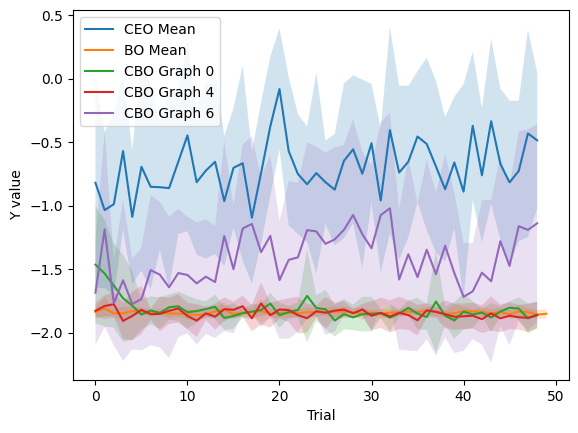

In [11]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=200, num_cbo_graphs=7,save_file=True, graph_idxs = [0, 4, 6])